In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

importing All the Libraries

In [ ]:
df = pd.read_csv("G:\Projects\Motorprice_prediction\BIKE DETAILS.csv")

In [ ]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [ ]:
df['ex_showroom_price'].isnull().sum()

435

In [ ]:
df['ex_showroom_price'].fillna(np.round(df['ex_showroom_price'].median(),2),inplace=True)
df['ex_showroom_price']

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [ ]:
np.round(df['ex_showroom_price'],2)

0        72752.5
1        72752.5
2       148114.0
3        89643.0
4        72752.5
          ...   
1056     52000.0
1057     51000.0
1058     57000.0
1059     58000.0
1060     75000.0
Name: ex_showroom_price, Length: 1061, dtype: float64

In [ ]:
df['name'].value_counts().head(15)


Bajaj Pulsar 150                 41
Royal Enfield Classic 350        27
Honda Activa [2000-2015]         23
Honda CB Hornet 160R             22
Bajaj Pulsar 180                 20
Royal Enfield Thunderbird 350    19
Hero Honda Splendor Plus         17
Bajaj Discover 125               16
Yamaha FZ S V 2.0                16
Honda Activa 3G                  15
Honda Shine                      15
Honda CB Unicorn 150             14
TVS Apache RTR 160               14
Bajaj Pulsar 135 LS              13
Honda Activa 5G                  12
Name: name, dtype: int64

In [ ]:
df['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

## Data Processing

Explorative Data Analysis

Text(0.5, 0, 'Count')

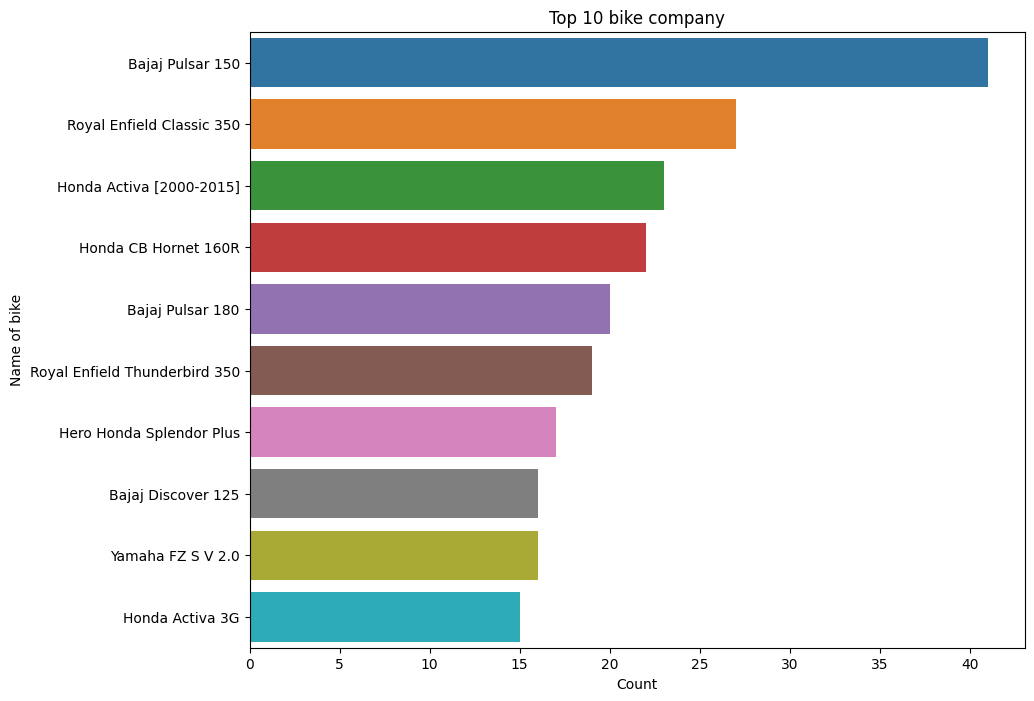

In [ ]:
top_bike_company = df['name'].value_counts().head(10)
plt.figure(figsize=(10, 8))
sns.barplot(x = top_bike_company, y = top_bike_company.index)
plt.ylabel('Name of bike')
plt.title('Top 10 bike company')
plt.xlabel('Count')

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

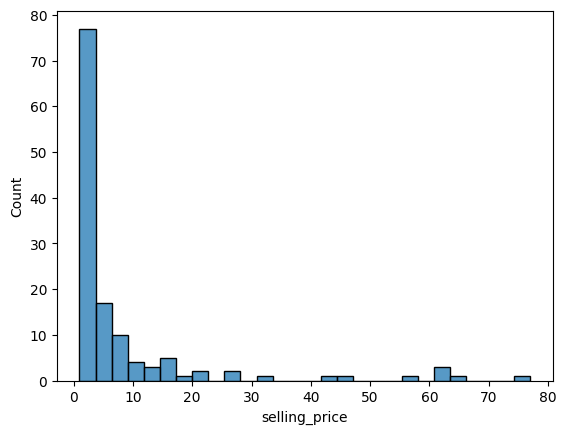

In [ ]:
sns.histplot(df['selling_price'].value_counts())

<AxesSubplot:xlabel='year', ylabel='count'>

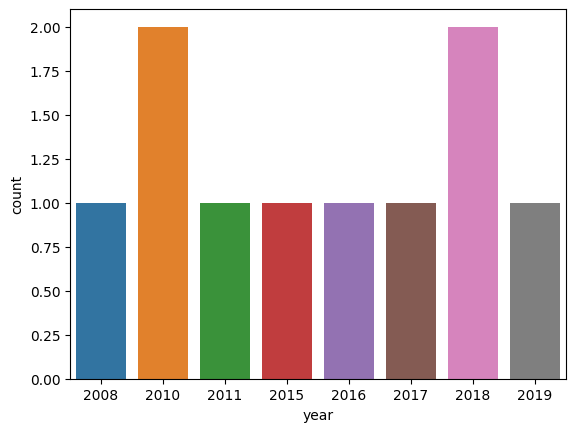

In [ ]:
sns.countplot(x=df['year'].head(10))

#### Handling the Categorical Values
    we can convert categorical data to binary data through OneHotEncoder method or get_dummies method

In [ ]:
df=pd.get_dummies(df,columns=["owner","seller_type"],drop_first=True)
df.head()

,name,selling_price,year,km_driven,ex_showroom_price,owner_2nd owner,owner_3rd owner,owner_4th owner,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,350,72752.5,0,0,0,1
1,Honda Dio,45000,2017,5650,72752.5,0,0,0,1
2,Royal Enfield Classic Gunmetal Grey,150000,2018,12000,148114.0,0,0,0,1
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,23000,89643.0,0,0,0,1
4,Yamaha SZ [2013-2014],20000,2011,21000,72752.5,1,0,0,1


In [ ]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [ ]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

In [81]:
df['brand'] = df['name'].apply(lambda x:brand(x))

In [82]:
df=df.drop(['name'],axis='columns')

In [83]:
df= pd.get_dummies(df, columns=['brand'], drop_first=True)

In [84]:
x=df.drop('selling_price',axis='columns')
y=df['selling_price']

Train Test and Split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [86]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [87]:
print("Model Intercept: ",lin_reg.intercept_)
print("Model Coefficient: ",lin_reg.coef_)
print("Model Coefficient: ",sum(lin_reg.coef_))

Model Intercept:  -7544932.626845734
Model Coefficient:  [ 3.75357605e+03 -4.35438593e-02  6.10303783e-01 -6.02407653e+03
  1.85262552e+04  1.87088060e+04 -8.48208983e+03 -5.34919397e+03
 -5.67901275e+03  7.64163409e+04  1.16307078e+04  5.43204384e+04
  9.93164456e+03  3.28108635e+03  9.49783516e+02]
Model Coefficient:  171984.83232131027


In [88]:
y_pred_test=lin_reg.predict(x_test)
y_pred_train=lin_reg.predict(x_train)

In [89]:
lin_reg.predict([[2019,350,72752.5,0,0,0,1,0,0,0,0,1,0,0,0]])

c:\Users\hp\pyhton\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([123761.64926375])

In [90]:
sum(y_pred_train)

47565579.99999902

In [91]:
train_res=y_train-y_pred_train
test_res=y_test-y_pred_test

In [92]:
train_res

22       9175.030103
1060   -15522.591704
480     -8716.346155
83        667.907655
571     32548.190585
            ...     
816     -6974.692751
719    -14468.640212
54      14488.847653
171    -17047.027601
552     25885.145531
Name: selling_price, Length: 795, dtype: float64

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [94]:
mse=mean_squared_error(y_test,y_pred_test)
print('Mean Squared error:',mse)
mae=mean_absolute_error(y_test,y_pred_test)
print("Mean absolute error:",mae)

Mean Squared error: 588124132.5395682
Mean absolute error: 15119.949955382714


In [95]:
rmse=np.sqrt(mse)
print('Root Mean Square:',rmse)

Root Mean Square: 24251.270740717242


In [96]:
train_score=lin_reg.score(x_train,y_train)
print('Training score:',train_score)

Training score: 0.8001903304596585


In [97]:
test_score=lin_reg.score(x_test,y_test)
print("Test Score:",test_score)

Test Score: 0.7780147893803493


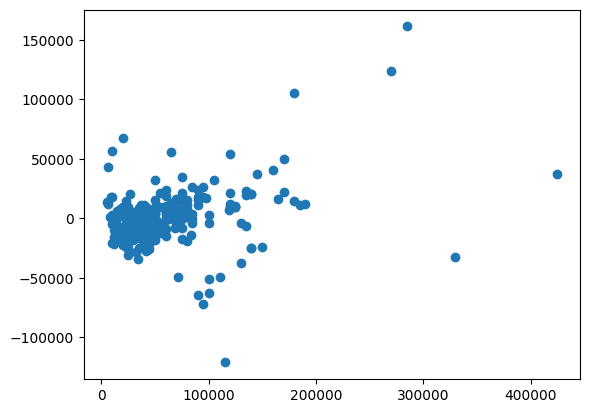

In [98]:
plt.scatter(y_test,test_res)

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

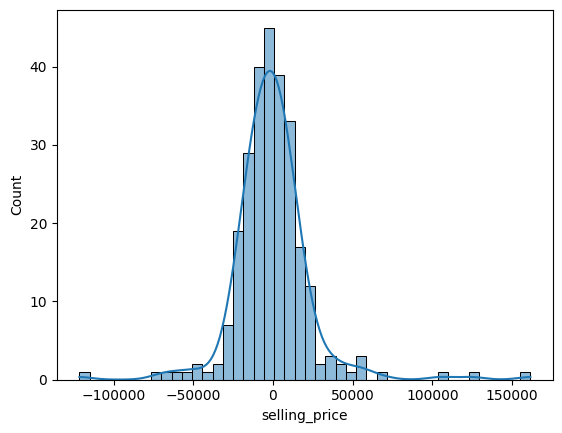

In [99]:
sns.histplot(test_res,kde=True)

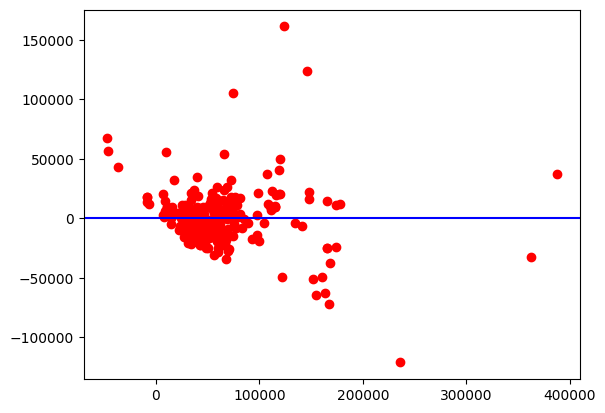

In [100]:
plt.scatter(y_pred_test,test_res,c='r')
plt.axhline(y=0,color='blue')

In [104]:
lin_reg.predict([[2019,350,72752.5,0,0,0,1,0,0,0,0,1,0,0,0]])

c:\Users\hp\pyhton\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([123761.64926375])

In [64]:
lin_reg.predict([[2020,550,7272.5,1,1,0,1,0,0,1,0,1,0,1,0]])

c:\Users\hp\pyhton\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167134.54261311])

Pikling the model file for Deployment

In [105]:
import pickle
pickle.dump(lin_reg,open("regmodel.pkl","wb"))

In [106]:
pickle_model=pickle.load(open("regmodel.pkl","rb"))

In [109]:
from joblib import dump, load

In [110]:
dump(lin_reg,"motor_cycle_prediction.joblib")

['motor_cycle_prediction.joblib']

Deployment

In [111]:
loaded_lin=load("motor_cycle_prediction.joblib")

In [112]:
loaded_model=load("motor_cycle_prediction.joblib")

In [113]:
loaded_model.predict([[2019,350,72752.5,0,0,0,1,0,0,0,0,1,0,0,0]])

c:\Users\hp\pyhton\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([123761.64926375])